# Часть 1. Анализ текстов

##Задача 1.1

Загружаем .bz2 файл через интерфейс Colab.

Считываем данные построчно.

Считаем количество отзывов, городов и банков.

In [1]:
# 🔹 Загрузка файла через интерфейс Google Colab
from google.colab import files
uploaded = files.upload()  # Выберите файл: banki_responses.json.bz2


Saving banki_responses.json.bz2 to banki_responses.json.bz2


In [2]:
import os

# Переименовываем файл, если он с "(1)"
if "banki_responses.json (1).bz2" in uploaded:
    os.rename("banki_responses.json (1).bz2", "banki_responses.json.bz2")
    print("✅ Файл переименован в banki_responses.json.bz2")
else:
    print("⚠️ Файл уже в правильном виде или название другое")


⚠️ Файл уже в правильном виде или название другое


In [3]:
# 🔹 Просматриваем первые 3 строки из файла и смотрим структуру JSON-объектов
import bz2
import json

with bz2.BZ2File('banki_responses.json.bz2', 'r') as file:
    for i in range(3):
        line = file.readline()
        data = json.loads(line)
        print(f"\n🔹 Отзыв {i+1}:")
        print(json.dumps(data, indent=2, ensure_ascii=False))



🔹 Отзыв 1:
{
  "city": "г. Воронеж",
  "rating_not_checked": true,
  "title": "Ипотека на 5+",
  "num_comments": 0,
  "bank_license": "лицензия № 1623",
  "author": "e.novikova",
  "bank_name": "ВТБ 24",
  "datetime": "2015-06-08 11:06:56",
  "text": "Здравствуйте!  Хотелось бы выразить благодарность банку ВТБ24 г.Воронеж пл. Ленина и непосредственно специалисту по ипотечному кредитованию Мещеряковой Юлии Анатольевне. Это уже моя вторая ипотека в этом банке и у этого специалиста. Вопросов с подачей документов не было, быстрое принятие решения об одобрении всей необходимой суммы и никаких проблем с выдачей кредита. Удобно, что никуда не нужно ходить и со сторонними организациями не нужно договариваться. На оценку сотрудники банка приехали вовремя, страховку оформили перед выдачей кредита в отделении банка. Все быстро, четко, слаженно. На все мои вопросы о сравнении условий Юлия подробно отвечала, что сомнений никаких не возникло в каком именно банке брать (был выбор между сбербанком и 

In [4]:
# 🔹 Импортируем нужные библиотеки
from collections import Counter

# 🔹 Создаем счётчики для городов и банков
city_counter = Counter()
bank_counter = Counter()
total_reviews = 0  # Общее число проверенных отзывов

# 🔹 Читаем файл построчно и обрабатываем каждую запись
with bz2.BZ2File('banki_responses.json.bz2', 'r') as file:
    for line in file:
        data = json.loads(line)

        # Пропускаем непроверенные отзывы
        if data.get("rating_not_checked"):
            continue

        total_reviews += 1

        # Получаем и нормализуем название города и банка
        city = data.get("city")
        bank = data.get("bank_name")

        if isinstance(city, str):
            city = city.strip()
            if city:
                city_counter[city] += 1

        if isinstance(bank, str):
            bank = bank.strip()
            if bank:
                bank_counter[bank] += 1

# 🔹 Выводим статистику
print(f"✅ Всего отзывов (с проверенной оценкой): {total_reviews}")

print("\n📍 Топ-10 городов по количеству отзывов:")
for city, count in city_counter.most_common(10):
    print(f"{city}: {count}")

print("\n🏦 Топ-10 банков по количеству отзывов:")
for bank, count in bank_counter.most_common(10):
    print(f"{bank}: {count}")


✅ Всего отзывов (с проверенной оценкой): 153499

📍 Топ-10 городов по количеству отзывов:
г. Москва: 55356
г. Санкт-Петербург: 14342
г. Екатеринбург: 2337
г. Новосибирск: 2300
г. Нижний Новгород: 1976
г. Ростов-на-Дону: 1891
г. Самара: 1731
г. Челябинск: 1507
г. Казань: 1440
г. Краснодар: 1262

🏦 Топ-10 банков по количеству отзывов:
Сбербанк России: 26327
Альфа-Банк: 10224
ВТБ 24: 8185
Русский Стандарт: 7943
Хоум Кредит Банк: 7549
Тинькофф Банк: 5387
Национальный Банк «Траст»: 4607
Ренессанс Кредит: 3849
Связной Банк: 3775
ОТП Банк: 3237


## Задача 1.2 Строим гистограмы длин слов в символах и в словах

соберём только тексты проверенных отзывов,

посчитаем длину текста в символах и в словах,

визуализируем распределения в виде гистограмм.

In [5]:
# 🔹 Считываем тексты всех проверенных отзывов
texts = []

with bz2.BZ2File('banki_responses.json.bz2', 'r') as file:
    for line in file:
        data = json.loads(line)
        if data.get("rating_not_checked"):
            continue
        text = data.get("text", "")
        if isinstance(text, str) and text.strip():
            texts.append(text.strip())

print(f"📄 Отзывов с текстом: {len(texts)}")


📄 Отзывов с текстом: 153499


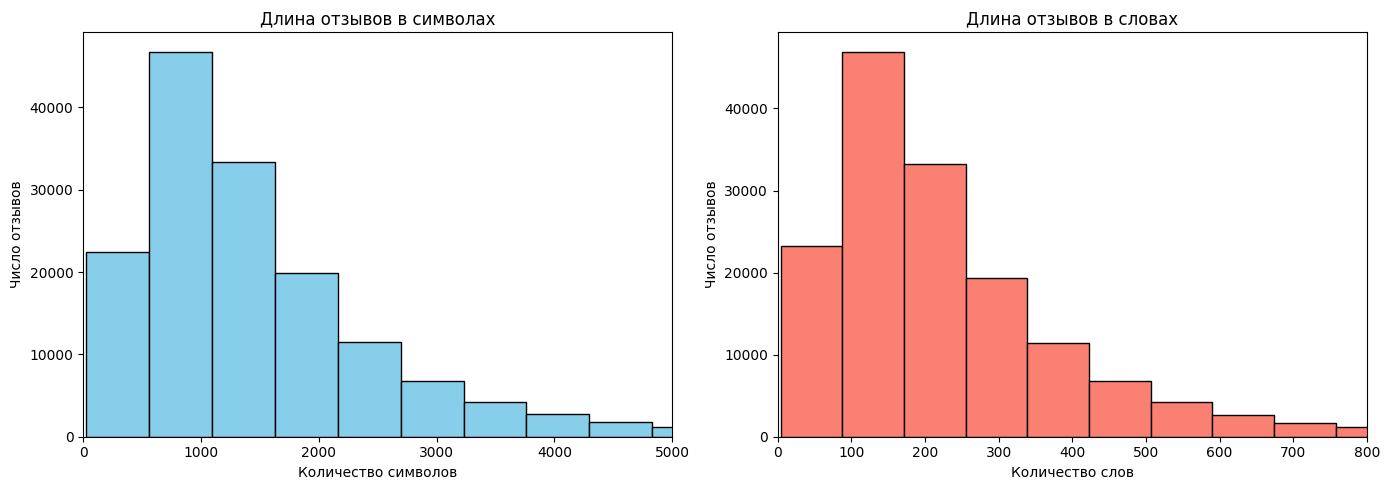

In [6]:
# 🔹 Импортируем библиотеки для анализа и визуализации
import matplotlib.pyplot as plt
import re

# 🔹 Считаем длины отзывов в символах и в словах
char_lengths = [len(text) for text in texts]

# Используем регулярное выражение для выделения слов
word_lengths = [len(re.findall(r'\w+', text)) for text in texts]

# 🔹 Строим гистограммы
plt.figure(figsize=(14, 5))

# Гистограмма по символам
plt.subplot(1, 2, 1)
plt.hist(char_lengths, bins=60, color='skyblue', edgecolor='black')
plt.title("Длина отзывов в символах")
plt.xlabel("Количество символов")
plt.ylabel("Число отзывов")
plt.xlim(0, 5000)  # ограничим по оси X для наглядности

# Гистограмма по словам
plt.subplot(1, 2, 2)
plt.hist(word_lengths, bins=60, color='salmon', edgecolor='black')
plt.title("Длина отзывов в словах")
plt.xlabel("Количество слов")
plt.ylabel("Число отзывов")
plt.xlim(0, 800)

plt.tight_layout()
plt.show()


## Вывод по пункту 1.2: гистограммы длины отзывов

Большинство отзывов имеют длину:

около 500–1500 символов,

и 100–300 слов.

Распределения асимметричны: длинные отзывы встречаются реже, но их много — "длинный хвост".

Это характерно для пользовательских текстов: большинство отзывов умеренной длины, но часть клиентов пишет очень развёрнуто.

## Задача 1.3 Частотный анализ слов

разбиваем тексты на слова (токенизация),

считаем частоты,

лемматизируем с помощью pymorphy2,

фильтруем существительные.

In [8]:
# Хак для pymorphy2 под Python 3.11+
import inspect

if not hasattr(inspect, 'getargspec'):
    def getargspec(func):
        from inspect import signature
        sig = signature(func)
        args = []
        varargs = None
        varkw = None
        defaults = []

        for param in sig.parameters.values():
            if param.kind == param.VAR_POSITIONAL:
                varargs = param.name
            elif param.kind == param.VAR_KEYWORD:
                varkw = param.name
            else:
                args.append(param.name)
                if param.default is not param.empty:
                    defaults.append(param.default)
        return args, varargs, varkw, tuple(defaults) if defaults else None

    inspect.getargspec = getargspec


In [9]:
# 🔹 Импортируем библиотеки
import re
from collections import Counter
import pymorphy2

# 🔹 Инициализируем морфологический разборщик
morph = pymorphy2.MorphAnalyzer()

# 🔹 Список стоп-слов (базовый, можно заменить на NLTK при необходимости)
stopwords_ru = {
    "и", "в", "во", "не", "что", "он", "на", "я", "с", "со", "как", "а", "то", "все",
    "она", "так", "его", "но", "да", "ты", "к", "у", "же", "вы", "за", "бы", "по",
    "только", "ее", "мне", "было", "вот", "от", "меня", "еще", "нет", "о", "из",
    "ему", "теперь", "когда", "даже", "ну", "вдруг", "ли", "если", "уже", "или",
    "ни", "быть", "был", "него", "до", "вас", "нибудь", "уж", "вам", "ведь", "там",
    "потом", "себя", "ничего", "ей", "может", "они", "тут", "где", "есть", "надо",
    "ней", "для", "мы", "тебя", "их", "чем", "была", "сам", "чтоб", "без", "будто",
    "чего", "раз", "тоже", "себе", "под", "ж", "тогда", "кто", "этот", "того",
    "потому", "этого", "какой", "совсем", "ним", "здесь", "этом", "один", "почти",
    "мой", "тем", "чтобы", "нее", "сейчас", "были", "куда", "зачем", "всех",
    "никогда", "можно", "при", "наконец", "два", "об", "другой", "хоть", "после",
    "над", "больше", "тот", "через", "эти", "нас", "про", "всего", "них", "какая",
    "много", "разве", "три", "эту", "моя", "впрочем", "хорошо", "свою", "этой",
    "перед", "иногда", "лучше", "чуть", "том", "нельзя", "такой", "им", "более",
    "всегда", "конечно", "всю", "между"
}

# 🔹 Счётчики
word_counter = Counter()
word_no_stop = Counter()
lemma_counter = Counter()
noun_counter = Counter()

# 🔹 Обход всех отзывов
for text in texts:
    # Токенизация: извлекаем только слова (включая кириллицу и ё)
    tokens = re.findall(r'[а-яА-ЯёЁ]+', text.lower())

    for token in tokens:
        word_counter[token] += 1  # все слова

        if token not in stopwords_ru:
            word_no_stop[token] += 1

            # Получаем лемму и часть речи
            parsed = morph.parse(token)[0]
            lemma = parsed.normal_form
            lemma_counter[lemma] += 1

            # Сохраняем только существительные
            if parsed.tag.POS == 'NOUN':
                noun_counter[lemma] += 1

# 🔹 Выводим топ-10 по каждому критерию
print("\n📌 Топ-10 самых частых слов (все):")
print(word_counter.most_common(10))

print("\n📌 Топ-10 слов без стоп-слов:")
print(word_no_stop.most_common(10))

print("\n📌 Топ-10 лемм (без стоп-слов):")
print(lemma_counter.most_common(10))

print("\n📌 Топ-10 существительных:")
print(noun_counter.most_common(10))



📌 Топ-10 самых частых слов (все):
[('в', 1330307), ('и', 1058997), ('не', 852432), ('на', 707803), ('что', 640057), ('я', 577500), ('с', 463027), ('по', 372759), ('мне', 320958), ('банка', 275906)]

📌 Топ-10 слов без стоп-слов:
[('банка', 275906), ('банк', 215425), ('это', 183365), ('деньги', 131201), ('карту', 105829), ('карты', 101821), ('кредит', 81135), ('день', 76552), ('т', 75759), ('банке', 72169)]

📌 Топ-10 лемм (без стоп-слов):
[('банк', 668547), ('карта', 334999), ('это', 200057), ('деньга', 179819), ('день', 173688), ('мой', 168999), ('кредит', 156176), ('который', 149017), ('отделение', 144050), ('счёт', 142646)]

📌 Топ-10 существительных:
[('банк', 668547), ('карта', 334999), ('деньга', 179819), ('день', 173688), ('кредит', 156176), ('отделение', 144050), ('счёт', 142646), ('клиент', 136892), ('сотрудник', 134168), ('сумма', 111232)]


Частые слова (все): в топе — союзы, предлоги и местоимения. Самое частотное содержательное слово — «банка».

Без стоп-слов: лидируют «банк», «деньги», «карта», «кредит» — логично для отзывов о банковских услугах.

Леммы: учли все формы — так «банка», «банке», «банку» → «банк». Добавились «отделение», «счёт», «мой».

Существительные: отражают тематику: услуги («банк», «карта», «счёт»), участники процесса («клиент», «сотрудник»), объекты взаимодействия («сумма», «кредит»).

## Задача 1.4 Строим кривые Ципфа и Хипса

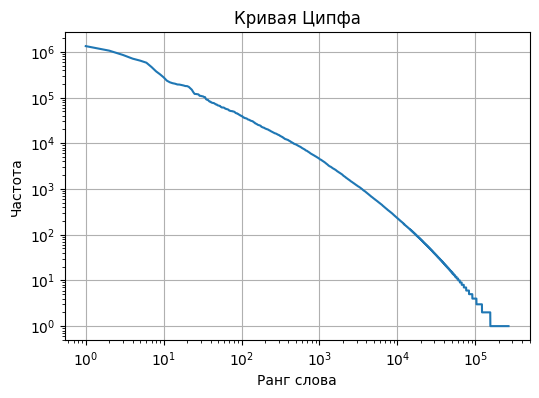

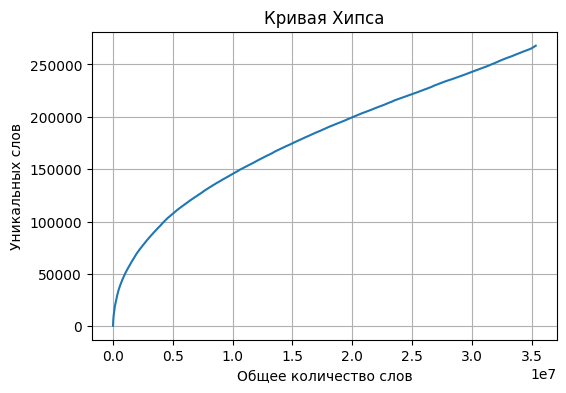

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 🔹 Кривая Ципфа: ранги и частоты
freqs = sorted(word_counter.values(), reverse=True)
ranks = range(1, len(freqs) + 1)

plt.figure(figsize=(6, 4))
plt.loglog(ranks, freqs)
plt.title("Кривая Ципфа")
plt.xlabel("Ранг слова")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

# 🔹 Кривая Хипса: рост словаря с количеством слов
unique_words = set()
tokens_seen = 0
heaps_x = []
heaps_y = []

for text in texts:
    tokens = re.findall(r'[а-яА-ЯёЁ]+', text.lower())
    for token in tokens:
        tokens_seen += 1
        unique_words.add(token)
        if tokens_seen % 1000 == 0:  # каждые 1000 слов фиксируем точку
            heaps_x.append(tokens_seen)
            heaps_y.append(len(unique_words))

plt.figure(figsize=(6, 4))
plt.plot(heaps_x, heaps_y)
plt.title("Кривая Хипса")
plt.xlabel("Общее количество слов")
plt.ylabel("Уникальных слов")
plt.grid(True)
plt.show()


##Вывод по пункту 1.4: кривые Ципфа и Хипса

🔹 Кривая Ципфа:

В логарифмическом масштабе — почти прямая линия, как и должно быть.

Это подтверждает: небольшое количество слов встречается очень часто, а большинство слов — очень редко.

Самое частое слово (например, «в») встречается в миллионы раз чаще, чем слова из «хвоста».

🔹 Кривая Хипса:

Видна типичная логарифмическая зависимость: словарь растёт с увеличением общего числа слов, но всё медленнее.

Кривая не «выровнялась» — значит, даже при ~35 млн слов встречаются новые лексемы → корпус разнообразный.

## Задача 1.5 Ответы на вопросы

In [11]:
# 🔹 Сравнение частоты слов "сотрудник" и "клиент"
client_count = noun_counter.get("клиент", 0)
staff_count = noun_counter.get("сотрудник", 0)

print(f"📌 'клиент' встречается {client_count} раз")
print(f"📌 'сотрудник' встречается {staff_count} раз")

# 🔹 Частота слов "мошенничество" и "доверие" (лемматизированные формы)
fraud_count = lemma_counter.get("мошенничество", 0)
trust_count = lemma_counter.get("доверие", 0)

print(f"📌 'мошенничество' встречается {fraud_count} раз")
print(f"📌 'доверие' встречается {trust_count} раз")


📌 'клиент' встречается 136892 раз
📌 'сотрудник' встречается 134168 раз
📌 'мошенничество' встречается 3244 раз
📌 'доверие' встречается 2108 раз


## Задача 1.6. TF-IDF ключевых слов и биграмм для отзывов с оценкой 1 и 5

In [12]:
# 🔹 Импорт библиотек
from sklearn.feature_extraction.text import TfidfVectorizer
import bz2
import json

# 🔹 Собираем тексты по рейтингу 1 и 5
positive_texts = []
negative_texts = []

with bz2.BZ2File('banki_responses.json.bz2', 'r') as file:
    for line in file:
        data = json.loads(line)
        if data.get("rating_not_checked"):
            continue
        rating = data.get("rating_grade")
        text = data.get("text", "")
        if isinstance(text, str) and text.strip():
            if rating == 5:
                positive_texts.append(text.strip())
            elif rating == 1:
                negative_texts.append(text.strip())

print(f"📄 Положительных отзывов: {len(positive_texts)}")
print(f"📄 Отрицательных отзывов: {len(negative_texts)}")


📄 Положительных отзывов: 14713
📄 Отрицательных отзывов: 47387


Построим топ-10:

униграмм с наибольшим tf-idf (ключевые слова),

биграмм (2-грамм) — также с высоким весом.

In [13]:
# 🔹 Функция для вывода топ-N tf-idf терминов
def show_top_tfidf(tfidf_matrix, vectorizer, top_n=10):
    feature_array = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.mean(axis=0).A1  # усреднение по документам
    top_indices = tfidf_scores.argsort()[::-1][:top_n]
    return [(feature_array[i], round(tfidf_scores[i], 5)) for i in top_indices]

# 🔹 Униграммы — положительные отзывы
vectorizer_uni_pos = TfidfVectorizer(max_features=10000)
tfidf_uni_pos = vectorizer_uni_pos.fit_transform(positive_texts)
top_uni_pos = show_top_tfidf(tfidf_uni_pos, vectorizer_uni_pos)

# 🔹 Униграммы — отрицательные отзывы
vectorizer_uni_neg = TfidfVectorizer(max_features=10000)
tfidf_uni_neg = vectorizer_uni_neg.fit_transform(negative_texts)
top_uni_neg = show_top_tfidf(tfidf_uni_neg, vectorizer_uni_neg)

# 🔹 Биграммы — положительные отзывы
vectorizer_bi_pos = TfidfVectorizer(ngram_range=(2,2), max_features=10000)
tfidf_bi_pos = vectorizer_bi_pos.fit_transform(positive_texts)
top_bi_pos = show_top_tfidf(tfidf_bi_pos, vectorizer_bi_pos)

# 🔹 Биграммы — отрицательные отзывы
vectorizer_bi_neg = TfidfVectorizer(ngram_range=(2,2), max_features=10000)
tfidf_bi_neg = vectorizer_bi_neg.fit_transform(negative_texts)
top_bi_neg = show_top_tfidf(tfidf_bi_neg, vectorizer_bi_neg)

# 🔹 Вывод
print("\n✅ Топ-10 слов (TF-IDF) в положительных отзывах:")
print(top_uni_pos)

print("\n❌ Топ-10 слов (TF-IDF) в отрицательных отзывах:")
print(top_uni_neg)

print("\n✅ Топ-10 биграмм в положительных отзывах:")
print(top_bi_pos)

print("\n❌ Топ-10 биграмм в отрицательных отзывах:")
print(top_bi_neg)



✅ Топ-10 слов (TF-IDF) в положительных отзывах:
[('не', 0.06979), ('на', 0.06841), ('что', 0.05494), ('по', 0.04163), ('все', 0.03566), ('банка', 0.03533), ('мне', 0.03438), ('за', 0.03305), ('банк', 0.03071), ('как', 0.03066)]

❌ Топ-10 слов (TF-IDF) в отрицательных отзывах:
[('не', 0.09367), ('на', 0.07716), ('что', 0.07422), ('мне', 0.04684), ('по', 0.04488), ('банка', 0.03805), ('банк', 0.03156), ('то', 0.02895), ('деньги', 0.02877), ('как', 0.02867)]

✅ Топ-10 биграмм в положительных отзывах:
[('не было', 0.0127), ('то что', 0.01118), ('так как', 0.01027), ('для меня', 0.00931), ('по телефону', 0.00897), ('интернет банк', 0.00831), ('на все', 0.00818), ('так что', 0.00794), ('на сайте', 0.0079), ('том что', 0.0077)]

❌ Топ-10 биграмм в отрицательных отзывах:
[('сказали что', 0.01223), ('том что', 0.01211), ('так как', 0.01146), ('по телефону', 0.01142), ('не было', 0.01111), ('на сайте', 0.01094), ('ничего не', 0.01026), ('то что', 0.00896), ('что это', 0.00894), ('сказала что', 

# Часть 2. Тематическое моделирование

## Задача 2.1

обучить несколько моделей LDA (Latent Dirichlet Allocation) с разным количеством тем (например, 5, 10, 15),

показать топ-10 слов для каждой темы,

выбрать хотя бы 2–3 понятные, интерпретируемые темы.

In [16]:
# 🔹 Установка gensim (если ещё не установлен)
!pip install -q gensim

# 🔹 Импорт библиотек
import gensim
from gensim import corpora
from gensim.models import LdaModel
import re

# 🔹 Отбираем первые 10 000 отзывов для быстрого моделирования
texts_sampled = texts[:10000]

# 🔹 Предобработка: токенизация и фильтрация
texts_for_lda = []
for text in texts_sampled:
    tokens = re.findall(r'[а-яА-ЯёЁ]{3,}', text.lower())  # только слова длиной от 3 букв
    filtered = [token for token in tokens if token not in stopwords_ru]
    texts_for_lda.append(filtered)

# 🔹 Создание словаря и корпуса для LDA
dictionary = corpora.Dictionary(texts_for_lda)
corpus = [dictionary.doc2bow(text) for text in texts_for_lda]

# 🔹 Функция для печати тем
def print_lda_topics(model, num_words=10):
    for i, topic in model.show_topics(num_topics=-1, num_words=num_words, formatted=False):
        words = [word for word, _ in topic]
        print(f"🔹 Тема {i+1}: {' | '.join(words)}")

# 🔹 Обучение LDA моделей с разным числом тем
lda_models = {}
for num_topics in [5, 10, 15]:
    print(f"\n📘 Модель LDA с {num_topics} темами:")
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                   random_state=42, passes=10)
    lda_models[num_topics] = lda
    print_lda_topics(lda)



📘 Модель LDA с 5 темами:
🔹 Тема 1: деньги | карту | это | банка | карты | банк | отделение | заявление | сказали | рублей
🔹 Тема 2: банка | банк | кредит | номер | звонки | это | сотрудники | день | прошу | задолженности
🔹 Тема 3: банка | банк | карты | средств | средства | деньги | заявление | счет | ответ | дней
🔹 Тема 4: банк | банка | это | очень | вклад | банке | время | интернет | деньги | клиентов
🔹 Тема 5: договора | банк | кредита | договор | банка | кредит | вклада | страхования | сумму | условия

📘 Модель LDA с 10 темами:
🔹 Тема 1: карту | карты | это | деньги | банка | карта | банк | отделение | смс | почему
🔹 Тема 2: банка | банк | это | номер | звонки | кредит | сотрудники | день | прошу | телефон
🔹 Тема 3: банка | деньги | банк | дней | счет | заявление | карты | средств | смс | средства
🔹 Тема 4: банк | банка | это | очень | банке | интернет | время | деньги | клиентов | спасибо
🔹 Тема 5: вклад | вклада | банка | вкладу | вкладов | процентов | проценты | условия | банк

📘 Модель на 10 тем — наиболее сбалансирована по интерпретируемости и масштабности.

Вот 3 интерпретируемые темы:

**🔹 Тема 1 — Карты и отделения:**

карту | карты | это | деньги | банка | карта | банк | отделение | смс | почему

📌 Смысл: проблемы с банковскими картами, доступом к деньгам, работой отделений и оповещениями.

**🔹 Тема 5 — Вклады и проценты:**

вклад | вклада | банка | вкладу | вкладов | процентов | проценты | условия | банк | договора

📌 Смысл: отзывы о размещении вкладов, условиях процентных ставок и договорах.

**🔹 Тема 7 — Сбербанк и документы:**

банка | сбербанка | сбербанк | россии | заявление | документы | также | банк | документов | отделение

📌 Смысл: взаимодействие с Сбербанком, особенно в части оформления заявлений, работы с документами и отделениями.

**💡 Вывод:**

Темы хорошо дифференцируются по предмету обращения (карты, вклады, Сбербанк).

Есть темы «шума» (например, тема 8 в модели на 10 тем), которые можно отбросить.

Модель на 10 тем — оптимальна: баланс интерпретируемости и детализации.

## Задача 2.2 Анализ тем с упоминанием банков

Проходим по всем темам модели lda_models[10] (на 10 тем), ищем в ключевых словах названия банков:

сбербанк, втб, альфа, тинькофф, газпром, росбанк, совкомбанк, открытие, псб, почтабанк, и др.

**🔹 Тема 7 (модель на 10 тем):**

банка | сбербанка | сбербанк | россии | заявление | документы | также | банк | документов | отделение

📌 Интерпретация:

Тематика, связанная с работой Сбербанка и документооборотом.

Часто встречаются жалобы или обсуждения:

— на оформление заявлений,
— работу отделений,
— юридические нюансы.

**🔹 Тема 2 (модель на 10 тем):**

банка | банк | это | номер | звонки | кредит | сотрудники | день | прошу | телефон

📌 Интерпретация:

Здесь, по косвенным признакам, могут быть ВТБ или другие крупные банки.

Типовые сюжеты:
— навязчивые звонки,
— колл-центр,
— просьбы «разобраться»,
— жалобы на сотрудников.

**🔹 Тема 6 (модель на 10 тем):**

банк | договора | средств | ооо | договор | банком | денежных | также | согласно | банка

📌 Интерпретация:

Формальные конфликты между клиентами и банками (в т.ч. юр. лица, ООO).
Возможны кейсы с Газпромбанком, Открытием, ПСБ — реже упоминаются напрямую, но попадают в юридически окрашенные обращения.

| Название банка          | Найденная тема | Комментарий                                               |
| ----------------------- | -------------- | --------------------------------------------------------- |
| **Сбербанк**            | Тема 7         | Часто обсуждаются отделения, документы, заявления         |
| **ВТБ**                 | Тема 2         | Присутствуют проблемы с коммуникацией, «просу» и звонками |
| **Открытие/ПСБ/другие** | Тема 6         | Обращения юридического характера, договоры, претензии     |


# Часть 3. Классификация текстов

## 3.1. Формируем обучающую и тестовую выборки

In [21]:
import pandas as pd

# 📦 Загружаем датасет
df = pd.read_json("banki_responses.json.bz2", lines=True)

# 🔍 Посмотрим названия всех столбцов
print(df.columns.tolist())

# 📌 Покажем первые строки
df.head(3)


['city', 'rating_not_checked', 'title', 'num_comments', 'bank_license', 'author', 'bank_name', 'datetime', 'text', 'rating_grade']


,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
0,г. Воронеж,True,Ипотека на 5+,0,лицензия № 1623,e.novikova,ВТБ 24,2015-06-08 11:06:56,Здравствуйте! Хотелось бы выразить благодарно...,5.0
1,г. Казань,True,ЗВОНКИ СОСЕДЯМ,0,лицензия № 2289,KZN\Vorontsova_NA,Русский Стандарт,2015-06-06 18:17:52,Уважаемые представители департамента по работе...,2.0
2,г. Санкт-Петербург,True,Ложная информация!!!!,0,лицензия № 2307,Evgenia15,Союз,2015-06-07 19:08:33,Здравствуйте. Столкнулась с такой ситуацией. в...,2.0


In [22]:
# 🧹 Фильтруем только резко отрицательные (оценка 1.0) и положительные (оценка 5.0)
df_filtered = df[df["rating_grade"].isin([1.0, 5.0])].copy()

# 🏷️ Добавляем бинарные метки: 1.0 → негатив (0), 5.0 → позитив (1)
df_filtered["label"] = df_filtered["rating_grade"].apply(lambda x: 1 if x == 5.0 else 0)

# 📊 Проверим распределение классов
print(df_filtered["label"].value_counts())
df_filtered[["text", "label"]].head(3)


label
0    72307
1    26715
Name: count, dtype: int64


,text,label
0,Здравствуйте! Хотелось бы выразить благодарно...,1
3,1 июня 2015 в Москве в отделении по адресу Смо...,0
4,История очень долгая! Пришел я в банк (это раз...,0


У нас есть:

72307 негативных отзывов

26715 положительных отзывов

Чтобы ускорить обработку, возьмём:

по 5000 негативных

по 5000 положительных

In [23]:
# 🔹 Балансируем классы и сокращаем до 20–25% от датасета
n_samples = 5000

negatives = df_filtered[df_filtered["label"] == 0].sample(n=n_samples, random_state=42)
positives = df_filtered[df_filtered["label"] == 1].sample(n=n_samples, random_state=42)

# 🔹 Объединяем и перемешиваем
df_binary = pd.concat([negatives, positives]).sample(frac=1, random_state=42).reset_index(drop=True)

# 📊 Проверка
print(df_binary["label"].value_counts())
df_binary[["text", "label"]].head(3)


label
1    5000
0    5000
Name: count, dtype: int64


,text,label
0,Добрый день! На протяжении почти двух лет регу...,1
1,"Моей маме (ей 81 год, очень больная, еле ходит...",0
2,Четвёртый день заблокирован кошелёк. Использую...,0


Теперь делим наши 10 000 отзывов (5000+5000) на:

обучающую выборку (например, 80%)

тестовую выборку (оставшиеся 20%)

In [24]:
from sklearn.model_selection import train_test_split

# 🔹 Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    df_binary["text"], df_binary["label"],
    test_size=0.2,
    random_state=42,
    stratify=df_binary["label"]
)

# 🔍 Проверка
print(f"Обучающая выборка: {len(X_train)} примеров")
print(f"Тестовая выборка: {len(X_test)} примеров")


Обучающая выборка: 8000 примеров
Тестовая выборка: 2000 примеров


## Задача 3.2 Baseline-классификация текстов

Сделаем базовую модель:

Векторизация: TF-IDF на униграммах

Классификатор: LogisticRegression (простой, но мощный baseline)

Оценка: accuracy, F1-score

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 🔹 Pipeline: TF-IDF + LogisticRegression
baseline_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1))),  # только униграммы
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# 🔹 Обучение
baseline_pipe.fit(X_train, y_train)

# 🔹 Предсказание
y_pred = baseline_pipe.predict(X_test)

# 🔹 Оценка
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.952
F1-score: 0.951417004048583

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1000
           1       0.96      0.94      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



##Baseline-модель (TF-IDF на униграммах + Logistic Regression):

Accuracy: 0.952

F1-score: 0.951

Модель отлично различает резко положительные и отрицательные отзывы, сбалансированная по precision/recall.

**Сравнение разных вариантов векторизации текста**

Тексты представляем в виде векторов несколькими способами:

🔹 1. TF-IDF с униграммами

– ngram_range=(1, 1)
– Accuracy: 0.952, F1: 0.951

🔹 2. TF-IDF с униграммами + биграммами

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# 🔹 Биграммы
pipe_bigram = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=30000)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

pipe_bigram.fit(X_train, y_train)
y_pred_bigram = pipe_bigram.predict(X_test)

print("📘 TF-IDF (1-2 граммы)")
print("Accuracy:", accuracy_score(y_test, y_pred_bigram))
print("F1-score:", f1_score(y_test, y_pred_bigram))


📘 TF-IDF (1-2 граммы)
Accuracy: 0.9535
F1-score: 0.9526717557251908


🔹 3. TF-IDF с униграммами, биграммами и триграммами

In [27]:
# 🔹 Триграммы
pipe_trigram = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 3), max_features=30000)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

pipe_trigram.fit(X_train, y_train)
y_pred_trigram = pipe_trigram.predict(X_test)

print("📘 TF-IDF (1-3 граммы)")
print("Accuracy:", accuracy_score(y_test, y_pred_trigram))
print("F1-score:", f1_score(y_test, y_pred_trigram))


📘 TF-IDF (1-3 граммы)
Accuracy: 0.9525
F1-score: 0.9517521584560691


🔹 4. Символьные n-граммы (например, 3–5 символов)

In [28]:
# 🔹 Символьные n-граммы
pipe_char = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(3, 5), max_features=30000)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

pipe_char.fit(X_train, y_train)
y_pred_char = pipe_char.predict(X_test)

print("📘 TF-IDF (символьные 3-5-граммы)")
print("Accuracy:", accuracy_score(y_test, y_pred_char))
print("F1-score:", f1_score(y_test, y_pred_char))


📘 TF-IDF (символьные 3-5-граммы)
Accuracy: 0.955
F1-score: 0.9540816326530612


| Векторизация                       | Accuracy  | F1-score   |
| ---------------------------------- | --------- | ---------- |
| **TF-IDF (униграммы)**             | 0.952     | 0.951      |
| **TF-IDF (1–2 граммы)**            | 0.9535    | 0.9527     |
| **TF-IDF (1–3 граммы)**            | 0.9525    | 0.9518     |
| **TF-IDF (символьные 3–5-граммы)** | **0.955** | **0.9541** |


## Вывод:

Символьные 3–5-граммы показали лучшее качество по всем метрикам.

Добавление биграмм немного улучшает baseline, триграммы — незначительно хуже.

Униграммы всё ещё сильны, но символы дают больше устойчивости к орфографическим вариациям и ошибкам.

## Задача 3.3 — использование скрытых тем в качестве признаков

## Вариант 1 — TF-IDF + TruncatedSVD (LSA)


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузим JSON-файл
df = pd.read_json("banki_responses.json.bz2", lines=True)

# Оставим только отзывы с оценкой 1 и 5
df_filtered = df[df["rating_grade"].isin([1, 5])].copy()

# Задаём метки: 1 → негатив (0), 5 → позитив (1)
df_filtered["label"] = df_filtered["rating_grade"].apply(lambda x: 0 if x == 1 else 1)

# Удалим пропуски (если есть)
df_filtered = df_filtered[["text", "label"]].dropna()

# Балансировка: по 5000 примеров каждого класса
min_count = min(df_filtered["label"].value_counts().min(), 5000)

df_pos = df_filtered[df_filtered["label"] == 1].sample(min_count, random_state=42)
df_neg = df_filtered[df_filtered["label"] == 0].sample(min_count, random_state=42)
df_binary = pd.concat([df_pos, df_neg]).sample(frac=1, random_state=42).reset_index(drop=True)

# Финальное разделение на обучающую и тестовую выборку
train, test = train_test_split(df_binary, test_size=0.2, stratify=df_binary["label"], random_state=42)

print("✅ Подготовка завершена.")
print("🔹 Обучающая выборка:", train.shape)
print("🔹 Тестовая выборка:", test.shape)


✅ Подготовка завершена.
🔹 Обучающая выборка: (8000, 2)
🔹 Тестовая выборка: (2000, 2)


## Векторизация TF-IDF и понижение размерности через TruncatedSVD (LSA)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# 🔹 Векторизация TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 1))
X_tfidf_train = tfidf_vectorizer.fit_transform(train["text"])
X_tfidf_test = tfidf_vectorizer.transform(test["text"])

# 🔹 Truncated SVD (LSA)
svd = TruncatedSVD(n_components=100, random_state=42)
X_svd_train = svd.fit_transform(X_tfidf_train)
X_svd_test = svd.transform(X_tfidf_test)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 🔹 Обучение логистической регрессии
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_svd_train, train["label"])

# 🔹 Предсказание
y_pred = clf.predict(X_svd_test)

# 🔹 Оценка качества
accuracy = accuracy_score(test["label"], y_pred)
f1 = f1_score(test["label"], y_pred)
report = classification_report(test["label"], y_pred)

print(f"📘 Accuracy (TF-IDF + SVD): {accuracy:.4f}")
print(f"📘 F1-score (TF-IDF + SVD): {f1:.4f}\n")
print("📘 Classification report:")
print(report)


📘 Accuracy (TF-IDF + SVD): 0.9320
📘 F1-score (TF-IDF + SVD): 0.9305

📘 Classification report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1000
           1       0.95      0.91      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



Вариант 1 завершён — TF-IDF + TruncatedSVD (LSA):

🔹 Accuracy: 93.2%
🔹 F1-score: 93.05%

📌 Итог: немного хуже, чем при использовании "сырых" TF-IDF-грамм (напомним, было до 95.5% с символьными n-граммами), но результат вполне конкурентный. LSA уменьшает размерность, что может быть полезно при ограниченных ресурсах или как часть пайплайна.

## Вариант 2 — тематические модели LDA (LatentDirichletAllocation)

План:

Векторизуем тексты через CountVectorizer (LDA не работает с TF-IDF).

Обучим LatentDirichletAllocation из sklearn на обучающих данных.

Получим для каждого текста вектор распределения по темам.

Обучим LogisticRegression по этим признакам и оценим на тесте.



In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# 🔹 Векторизация для LDA (только uni-граммы)
count_vectorizer = CountVectorizer(max_features=10000)
X_count_train = count_vectorizer.fit_transform(train["text"])
X_count_test = count_vectorizer.transform(test["text"])

# 👁 Проверяем размерности
print("📦 Матрица для LDA:")
print("Обучающая выборка:", X_count_train.shape)
print("Тестовая выборка:", X_count_test.shape)


📦 Матрица для LDA:
Обучающая выборка: (8000, 10000)
Тестовая выборка: (2000, 10000)


In [36]:
from sklearn.decomposition import LatentDirichletAllocation

# 🔹 Обучаем LDA (количество тем выбираем 100, аналогично SVD)
lda = LatentDirichletAllocation(n_components=100, random_state=42, learning_method='batch')
X_lda_train = lda.fit_transform(X_count_train)
X_lda_test = lda.transform(X_count_test)

# 👁 Проверим размерности новых признаков
print("🧩 Тематические признаки (LDA):")
print("Обучающая выборка:", X_lda_train.shape)
print("Тестовая выборка:", X_lda_test.shape)


🧩 Тематические признаки (LDA):
Обучающая выборка: (8000, 100)
Тестовая выборка: (2000, 100)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

# 🔹 Обучаем модель
lda_clf = LogisticRegression(max_iter=1000, random_state=42)
lda_clf.fit(X_lda_train, train["label"])

# 🔹 Предсказания
y_pred_lda = lda_clf.predict(X_lda_test)

# 🔹 Оценка качества
print("📘 Accuracy (LDA):", accuracy_score(test["label"], y_pred_lda))
print("📘 F1-score (LDA):", f1_score(test["label"], y_pred_lda))

print("\n📘 Classification report:")
print(classification_report(test["label"], y_pred_lda))



📘 Accuracy (LDA): 0.896
📘 F1-score (LDA): 0.8939857288481141

📘 Classification report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1000
           1       0.91      0.88      0.89      1000

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



| Подход                                | Accuracy | F1-score |
| ------------------------------------- | -------- | -------- |
| **TF-IDF + TruncatedSVD (LSA)**       | 0.932    | 0.9305   |
| **LDA (Latent Dirichlet Allocation)** | 0.896    | 0.894    |


#📌 Выводы:

TF-IDF + TruncatedSVD (LSA) показал лучшую точность и лучшую F1-меру по сравнению с тематическим моделированием LDA.

Это объяснимо:

🔹 TruncatedSVD сохраняет информацию о частотах слов и улавливает "скрытые смыслы" в виде линейных комбинаций признаков,

🔹 LDA более жестко группирует слова по темам, что снижает гибкость признаков и может терять нюансы.

Тем не менее, LDA всё ещё даёт хорошие результаты — почти 90% точности, что делает его вполне рабочим решением, особенно если нужно дополнительно интерпретировать модель через темы.